In [72]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


import h5py
import numpy as np
CWFile = h5py.File("conventional_flux.h5","r")
MMFile = h5py.File("Marjon_Int_HondaGaisser.h5", "r")
def printname(name):
    print name
CWFile.visit(printname)
print
MMFile.visit(printname)

detector_correction
detector_correction/2010
detector_correction/2011
detector_correction/bin_edges_0
detector_correction/bin_edges_1
detector_correction/bin_edges_2
nu_mu
nu_mu/bin_edges_0
nu_mu/bin_edges_1
nu_mu/integrated_flux
nu_mu_bar
nu_mu_bar/bin_edges_0
nu_mu_bar/bin_edges_1
nu_mu_bar/integrated_flux

README
bin_edges
bin_edges/cosz_bin_edges
bin_edges/energy_bin_edges
k_nu_mu
k_nu_mu/integrated_flux
k_nu_mu_bar
k_nu_mu_bar/integrated_flux
pi_nu_mu
pi_nu_mu/integrated_flux
pi_nu_mu_bar
pi_nu_mu_bar/integrated_flux


In [73]:
CW_nu_mu = CWFile['nu_mu/integrated_flux']
CW_nu_mu.shape

(280, 11)

In [74]:
MM_pi_nu_mu = MMFile['pi_nu_mu/integrated_flux']
MM_pi_nu_mu.shape

(280, 11)

In [75]:
readme = MMFile['README']

In [76]:
readme[:]

array([[ 'These fluxes are the bin-integrated initial numu (bar) fluxes originating from pions and kaons, separately, according to HondaGaisser models, before propagation through the Earth. I started with the fluxes come from the IC86 Sterile Neutrino Data release:  IC86SterileNeutrinoDataRelease/atmospheric_flux/initial/ I fit a spline to that data, and I used the energy and cosZ bins for which we have detector corrections. These fluxes are integrated over cosZ and energy bins, and over 2pi in azimuthal angle.']], 
      dtype='|S1000')

In [77]:
bins0 = CWFile['nu_mu/bin_edges_0']
bins0.size

281

In [78]:
#for i in np.arange(bins0.size):
   # print bins0[i] , ","

In [79]:
#sum_E = np.array(np.zeros(280))
#sum_E = np.sum(pi_nu_mu+pi_nu_mu_bar+k_nu_mu+k_nu_mu_bar,axis=1)

In [80]:
with h5py.File("Marjon_Int_HondaGaisser.h5", 'r') as f:
    pi_nu_mu = f['pi_nu_mu/integrated_flux'][()]
    pi_nu_mu_bar = f['pi_nu_mu_bar/integrated_flux'][()]
    k_nu_mu = f['k_nu_mu/integrated_flux'][()]
    k_nu_mu_bar = f['k_nu_mu_bar/integrated_flux'][()]
    bin_edges = f['bin_edges/energy_bin_edges'][()]

In [81]:
with h5py.File("conventional_flux.h5", "r") as f1:
    cw_numu = f1['nu_mu/integrated_flux'][()]
    cw_numu_bar = f1['nu_mu_bar/integrated_flux'][()]

In [82]:
sum_E = np.sum(k_nu_mu_bar,axis=1)
print pi_nu_mu.shape
print pi_nu_mu_bar.shape
print cw_numu.shape

(280, 11)
(280, 11)
(280, 11)


In [83]:
bin_centers = np.array(np.zeros(bin_edges.size-1))

for i in np.arange(bin_edges.size-1):
    bin_centers[i] = (bin_edges[i]+bin_edges[i+1]/2)

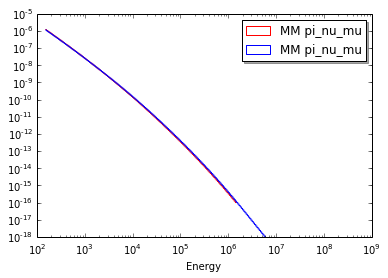

In [84]:
plt.hist(bin_centers, bins=bin_edges, weights=np.sum(pi_nu_mu+k_nu_mu,axis=1), histtype="step", color='r', label="MM pi_nu_mu")
plt.hist(bin_centers, bins=bin_edges, weights=np.sum(cw_numu,axis=1), histtype="step", color='b', label="MM pi_nu_mu")
#plt.hist(bin_centers, bins=bin_edges, weights=np.sum(pi_nu_mu_bar,axis=1), histtype="step", color='g', label="MM pi_nu_mu")

plt.yscale('log')
plt.xscale('log')
plt.ylim(ymax = 10**-5, ymin= 10**-18)
plt.xlabel('Energy')
legend = plt.legend(loc='upper right', shadow=True)
plt.savefig("spectrum.png")

In [85]:
#sum_E